In [62]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

import warnings
warnings.filterwarnings("ignore")

In [63]:
# Load the cleaned dataset
df = pd.read_csv('loan_approval_final.csv')

In [64]:
# Display the first few rows of the dataset
print("First few rows of the dataset:")
print(df.head())

First few rows of the dataset:
    Loan_ID  Gender  Married  Dependents  Education  Self_Employed  \
0  LP001003       1        1           1          0              0   
1  LP001005       1        1           0          0              1   
2  LP001006       1        1           0          1              0   
3  LP001008       1        0           0          0              0   
4  LP001011       1        1           2          0              1   

   ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
0             4583             1508.0       128.0             360.0   
1             3000                0.0        66.0             360.0   
2             2583             2358.0       120.0             360.0   
3             6000                0.0       141.0             360.0   
4             5417             4196.0       267.0             360.0   

   Credit_History  Property_Area  Loan_Status  
0             1.0              0            0  
1             1.0        

In [65]:
print("Column Names of df_encoded:", df.columns)

Column Names of df_encoded: Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')


In [66]:
# Check data types of attributes
data_types = df.dtypes
print("Data Types:\n", data_types)

Data Types:
 Loan_ID               object
Gender                 int64
Married                int64
Dependents             int64
Education              int64
Self_Employed          int64
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area          int64
Loan_Status            int64
dtype: object


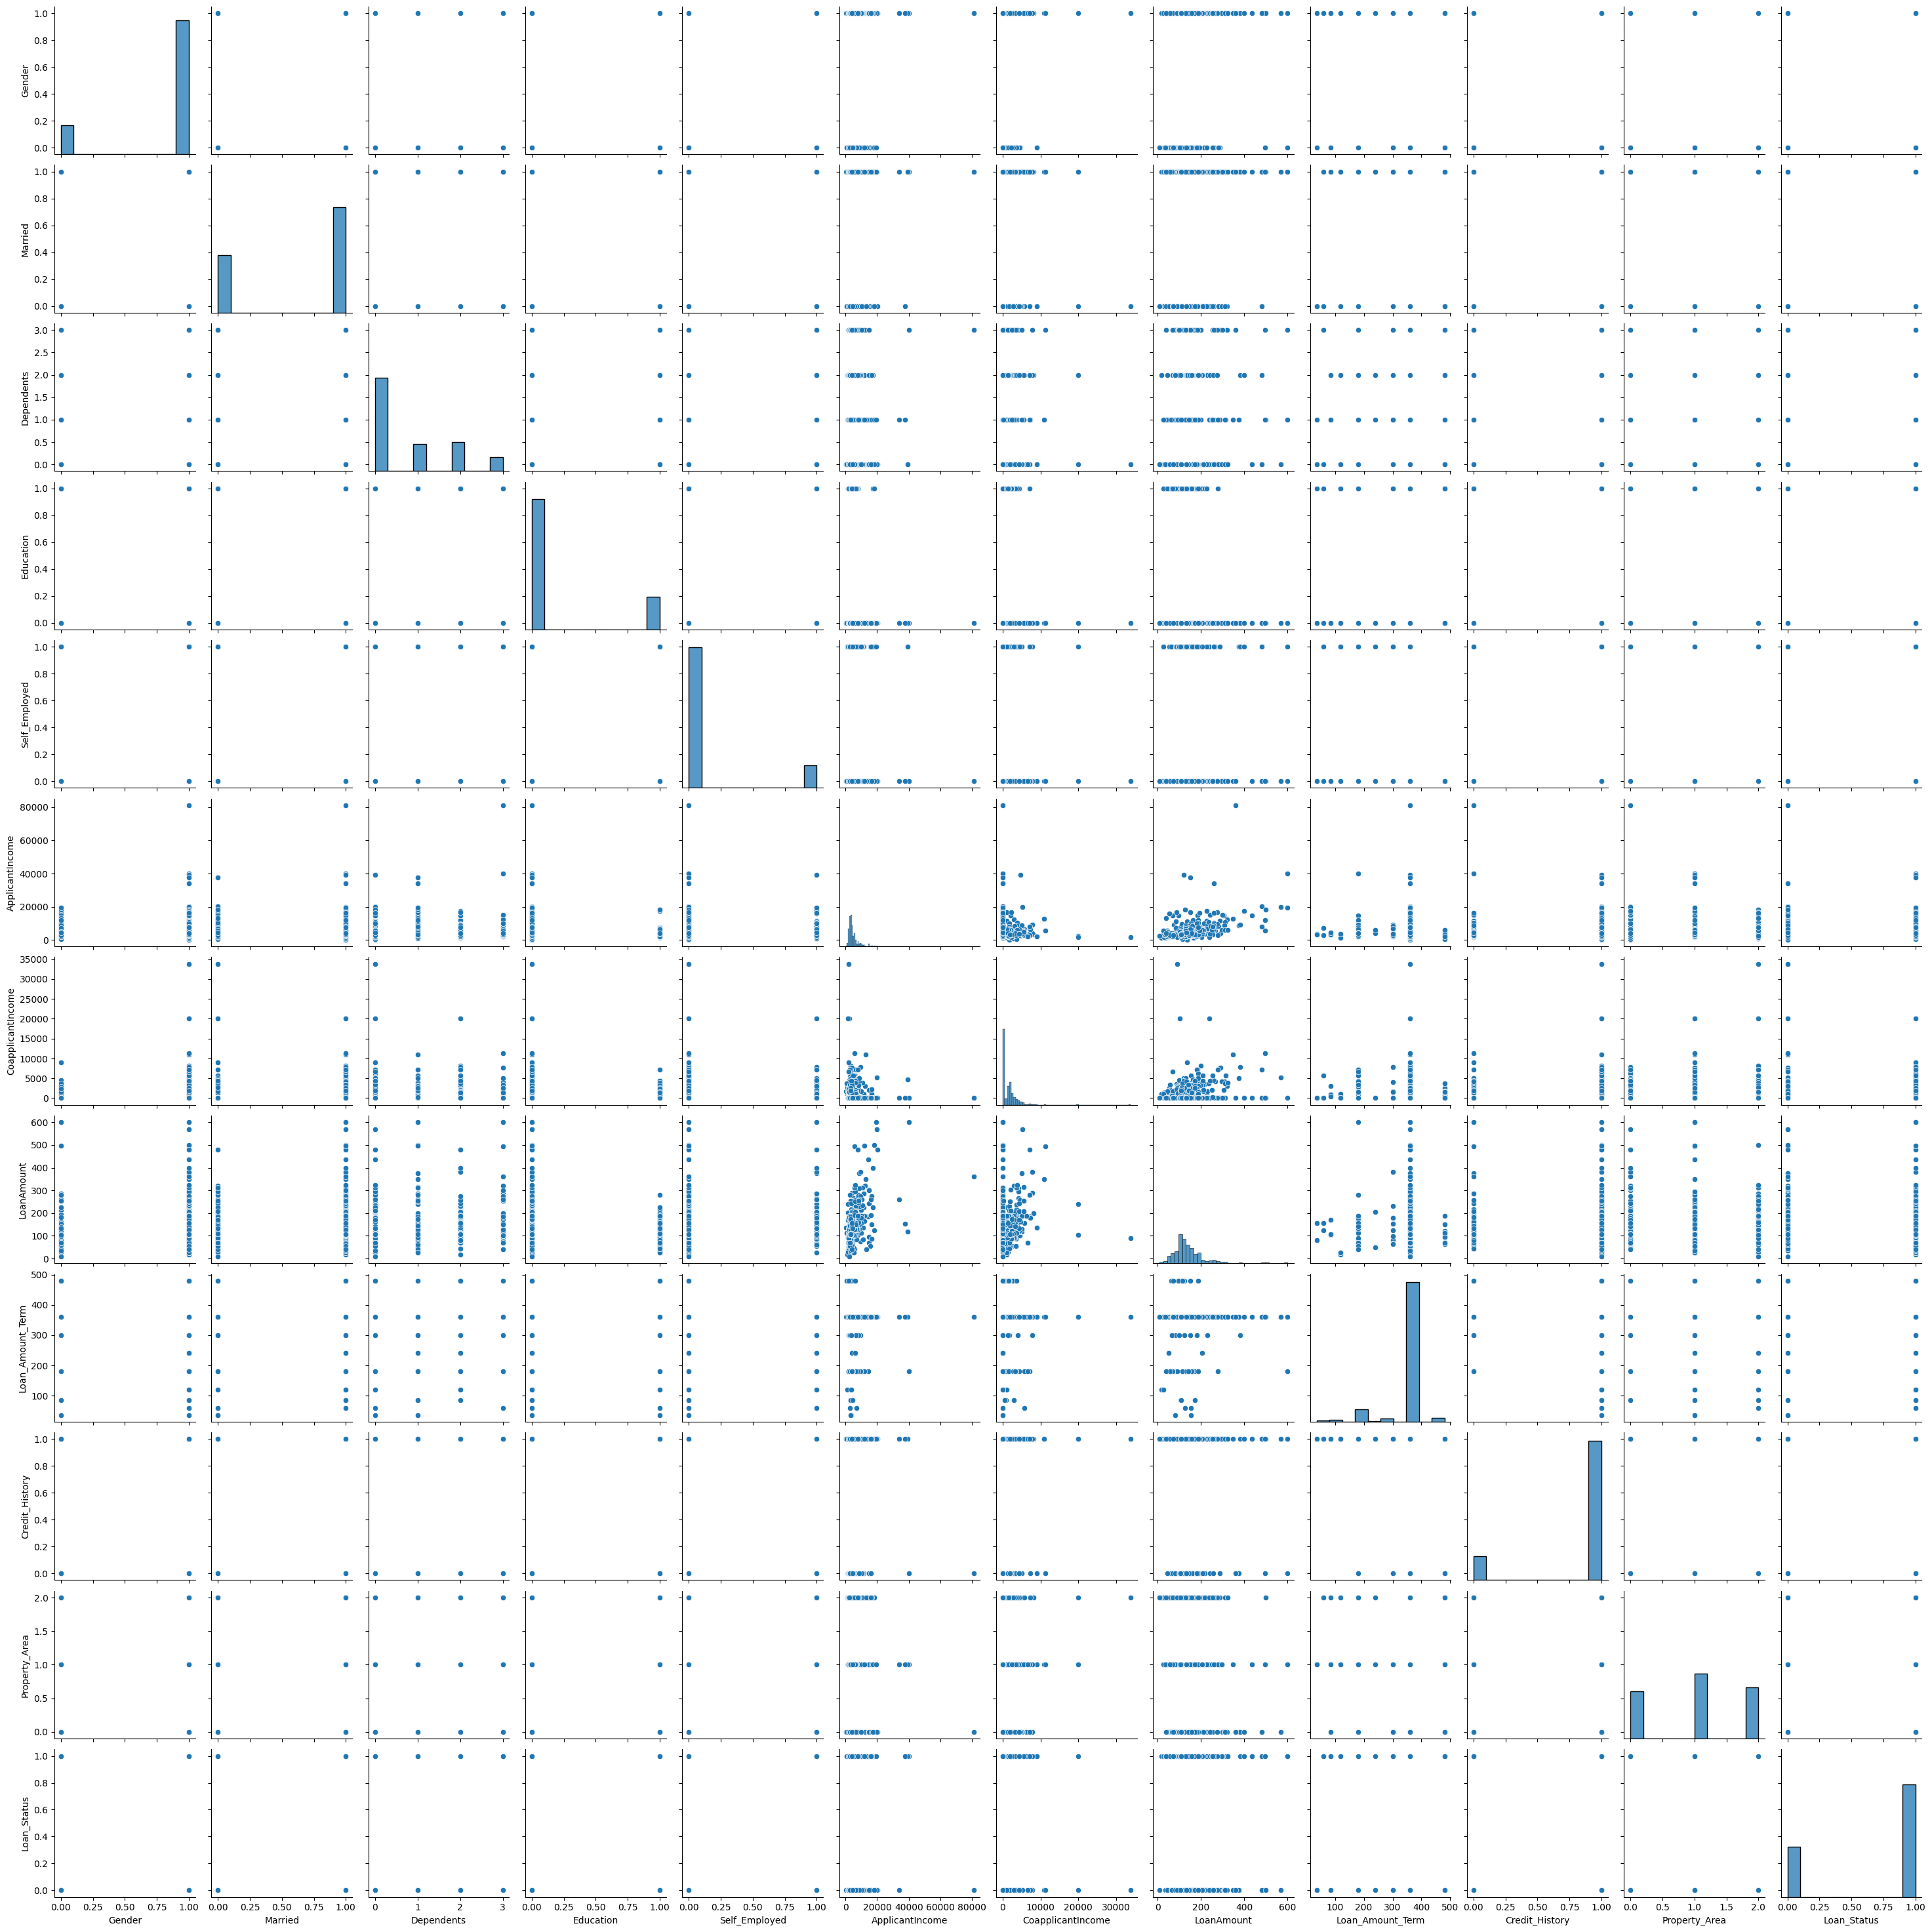

In [89]:
sns.pairplot(df)
plt.show()

In [68]:
# Encode categorical variables
df_encoded = pd.get_dummies(df, drop_first=True)

In [69]:
print("Column Names of df_encoded:", df_encoded.columns)

Column Names of df_encoded: Index(['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed',
       'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History',
       ...
       'Loan_ID_LP002958', 'Loan_ID_LP002959', 'Loan_ID_LP002961',
       'Loan_ID_LP002964', 'Loan_ID_LP002974', 'Loan_ID_LP002978',
       'Loan_ID_LP002979', 'Loan_ID_LP002983', 'Loan_ID_LP002984',
       'Loan_ID_LP002990'],
      dtype='object', length=491)


In [70]:
Y = df_encoded['Loan_Status']

In [71]:
# Separate predictors (X) and target variable (Y)
X = df_encoded.drop(columns=['Loan_Status'])  # Drop the original and encoded target variables
X = X.loc[:, ~X.columns.str.startswith('Loan_ID')]  # Remove the Loan_ID column

In [72]:
# Print the columns of X after removing 'Loan_ID' columns
print("Columns of X after removing 'Loan_ID' columns:")
print(X.columns)

Columns of X after removing 'Loan_ID' columns:
Index(['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed',
       'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area'],
      dtype='object')


In [73]:
# Perform Exploratory Data Analysis (EDA)
# Check class distribution of target variable
class_distribution = df['Loan_Status'].value_counts()
print("Class Distribution of Loan_Status:")
print(class_distribution)

Class Distribution of Loan_Status:
Loan_Status
1    332
0    148
Name: count, dtype: int64


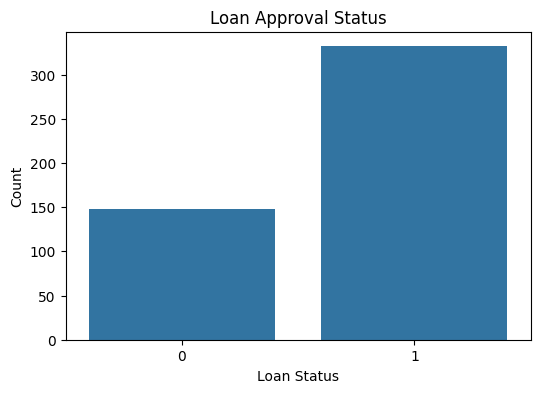

In [74]:
# Visualize class distribution
plt.figure(figsize=(6, 4))
sns.countplot(x='Loan_Status', data=df)
plt.title('Loan Approval Status')
plt.xlabel('Loan Status')
plt.ylabel('Count')
plt.show()

In [75]:
# Summary statistics of numerical features
num_summary = df.describe()
print("Summary Statistics of Numerical Features:")
print(num_summary)

Summary Statistics of Numerical Features:
           Gender     Married  Dependents   Education  Self_Employed  \
count  480.000000  480.000000  480.000000  480.000000     480.000000   
mean     0.820833    0.647917    0.777083    0.202083       0.137500   
std      0.383892    0.478118    1.020815    0.401973       0.344734   
min      0.000000    0.000000    0.000000    0.000000       0.000000   
25%      1.000000    0.000000    0.000000    0.000000       0.000000   
50%      1.000000    1.000000    0.000000    0.000000       0.000000   
75%      1.000000    1.000000    2.000000    0.000000       0.000000   
max      1.000000    1.000000    3.000000    1.000000       1.000000   

       ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
count       480.000000         480.000000  480.000000        480.000000   
mean       5364.231250        1581.093583  144.735417        342.050000   
std        5668.251251        2617.692267   80.508164         65.212401   
min      

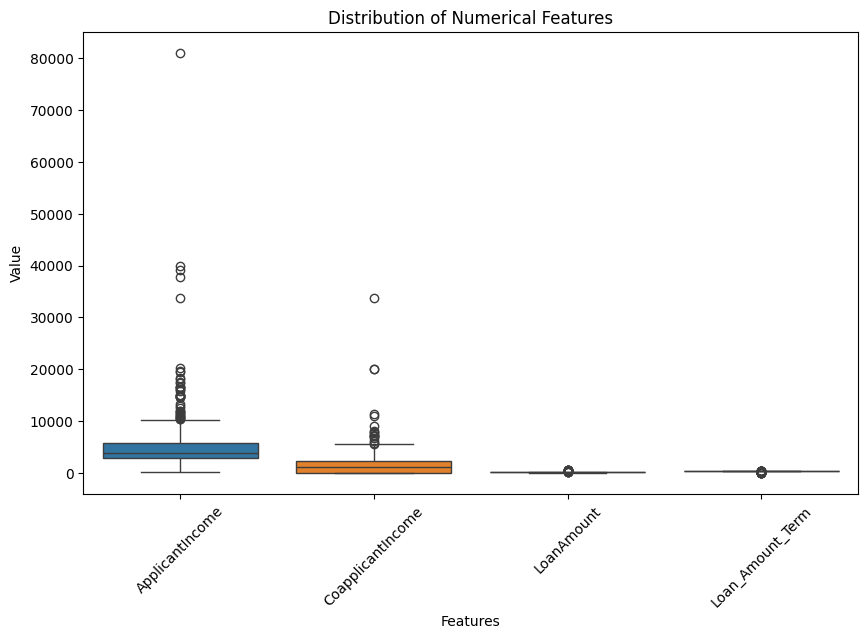

In [76]:
# Visualize numerical features
plt.figure(figsize=(10, 6))
sns.boxplot(data=df[['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term']])
plt.title('Distribution of Numerical Features')
plt.xlabel('Features')
plt.ylabel('Value')
plt.xticks(rotation=45)
plt.show()

In [77]:
# Split the data into training and testing sets (80% training, 20% testing)
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [78]:
# Initialize the logistic regression model
model = LogisticRegression()

# Train the model on the training data
model.fit(X_train, Y_train)

LogisticRegression()

In [79]:
# Evaluating the model using 10-fold cross-validation
cv_scores = cross_val_score(model, X, Y, cv=10)
print("Cross-Validation Scores:", cv_scores)
print("Mean CV Accuracy:", np.mean(cv_scores))

Cross-Validation Scores: [0.79166667 0.8125     0.77083333 0.79166667 0.77083333 0.77083333
 0.8125     0.83333333 0.77083333 0.8125    ]
Mean CV Accuracy: 0.79375


In [80]:
# Make predictions on the testing data
Y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(Y_test, Y_pred)
print("Accuracy:", accuracy)

# Classification report
print("Classification Report:\n", classification_report(Y_test, Y_pred))

# Confusion matrix
conf_matrix = confusion_matrix(Y_test, Y_pred)
print("Confusion Matrix:\n", conf_matrix)

Accuracy: 0.8229166666666666
Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.39      0.56        28
           1       0.80      1.00      0.89        68

    accuracy                           0.82        96
   macro avg       0.90      0.70      0.73        96
weighted avg       0.86      0.82      0.79        96

Confusion Matrix:
 [[11 17]
 [ 0 68]]


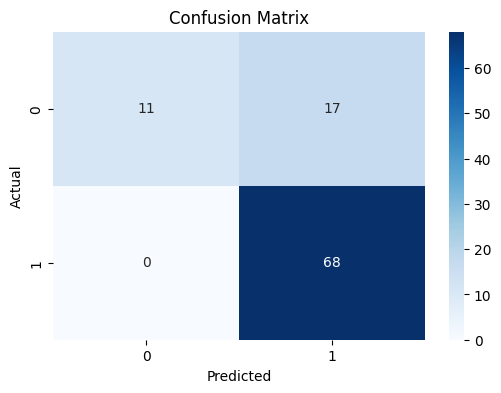

In [81]:
# Visualize confusion matrix
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, cmap='Blues', fmt='d')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [82]:
print("Model Accuracy:", accuracy)
print("Challenges Faced:")
print("1. Class imbalance: Addressed using class weights or resampling techniques.")
print("2. Overfitting/Underfitting: Checked using cross-validation and adjusted hyperparameters.")

Model Accuracy: 0.8229166666666666
Challenges Faced:
1. Class imbalance: Addressed using class weights or resampling techniques.
2. Overfitting/Underfitting: Checked using cross-validation and adjusted hyperparameters.


Sample Demo to try to predict approval, by adding new data

In [83]:
# Create new loan application data
new_data = pd.DataFrame({
    'ApplicantIncome': [5000, 6000],
    'CoapplicantIncome': [2000, 1500],
    'LoanAmount': [200, 250],
    'Loan_Amount_Term': [360, 360],
    'Credit_History': [1, 0],  
    'Dependents': [2, 1],
    'Gender': ['Male', 'Female'],
    'Married': ['Yes', 'No'],
    'Education': ['Graduate', 'Graduate'],
    'Self_Employed': ['No', 'Yes'],
    'Property_Area': ['Urban', 'Rural']
})

In [84]:
# Ensure that the columns in new_data match the columns used in X_train
new_data = new_data[X_train.columns]

In [85]:

# Integer encode categorical attributes in new data
categorical_cols = ['Gender', 'Married', 'Education', 'Self_Employed', 'Property_Area']
for col in categorical_cols:
    new_data[col] = new_data[col].astype('category').cat.codes

In [86]:

# Predict outcomes for new loan applications
new_predictions = model.predict(new_data)

In [87]:
# Interpret the prediction results
for idx, prediction in enumerate(new_predictions):
    print(f"Loan Application {idx+1}: {'Approved' if prediction == 1 else 'Not Approved'}")

Loan Application 1: Approved
Loan Application 2: Not Approved


In [88]:
print("Interpretation of Prediction Results:")
print("1. Model accurately predicts loan approval for most cases.")
print("2. One new application was not approved, possibly due to low credit history.")

Interpretation of Prediction Results:
1. Model accurately predicts loan approval for most cases.
2. One new application was not approved, possibly due to low credit history.
